# Soccer Mining League
## Predict result one league and one season

#### Data Mining PESC/COPPE/UFRJ
#### Required: Python 3.5, Numpy, Scikit-Learn, Matplotlib

In [1]:
import numpy as np

#Sklearn -- preprocessing 
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

#Plots
%matplotlib inline

from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler

from sklearn.cross_validation import cross_val_score

#Sklearn -- Metrics
from sklearn.metrics import accuracy_score, confusion_matrix

# Soccer Mining League Functions
from functions import *

/home/hugdiniz/Work/programs/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Reading dataset

#### Reading from file

In [2]:
season1 = np.loadtxt("../dataset/formated_files/matchs_teams_players_germany_league_2014_2015_formated.csv",delimiter=",")
season2 = np.loadtxt("../dataset/formated_files/matchs_teams_players_germany_league_2015_2016_formated.csv",delimiter=",")

#### Recover output

In [3]:
outputsSeason1 = season1[:,907]
outputsRSeason1 = season1[:,[908,909]]

outputsSeason2 = season2[:,907]
outputsRSeason2 = season2[:,[908,909]]

## Preprocessing

#### Maximize sparse teams

In [4]:
enc = preprocessing.OneHotEncoder()
enc.fit(season2[:,[0]])
teamsH = enc.transform(np.concatenate((season1[:,[0]],season2[:,[0]]),axis=0)) 
teamsA = enc.transform(np.concatenate((season1[:,[1]],season2[:,[1]]),axis=0)) 
teams = (teamsH + teamsA).toarray()
teamsSeason1 = teams[range(len(season2[:,[0]]))]
teamsSeason2 = teams[range(len(season2[:,[0]]),2*len(season2[:,[0]]))]


### Preprocessing Season 1

#### Reducing Dimensionality for team ratings

In [5]:
homeRateTeam = season1[:,[47,48,49,50,51,52,53,54,55,56,57,58]]
awayRateTeam = season1[:,[59,60,61,62,63,64,65,66,67,68,69,70]]

pca = decomposition.PCA(n_components=6)
homeRateTeamPreprocessed = pca.fit_transform(homeRateTeam)

pca = decomposition.PCA(n_components=6)
awayRateTeampreprocessed = pca.fit_transform(awayRateTeam)

#### Reducing Dimensionality for players

In [6]:
xTatics = season1[:,[3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46]]

playersRD = [decomposition.PCA(n_components=9).fit_transform(np.concatenate((season1[:,range(71+(pos*38),71+((pos+1)*38))],xTatics[:,[pos,pos+22]]),axis=1)) for pos in range(22)]

#### Concatenate inputs

In [7]:
date = season1[:,[2]]
print(awayRateTeampreprocessed[:,1].size)
inputsSeason1 = np.concatenate((homeRateTeamPreprocessed,awayRateTeampreprocessed,teamsSeason1,date), axis=1)

for playerRD in playersRD:
    inputsSeason1 = np.concatenate((inputsSeason1,playerRD), axis=1)


306


#### Scaling inputs

In [8]:
inputsSeason1 = StandardScaler().fit_transform(inputsSeason1)

inputsSeason1[1,:].size

229

## Preprocessing Season 2

#### Reducing Dimensionality for team ratings

In [9]:
homeRateTeam = season2[:,[47,48,49,50,51,52,53,54,55,56,57,58]]
awayRateTeam = season2[:,[59,60,61,62,63,64,65,66,67,68,69,70]]

pca = decomposition.PCA(n_components=6)
homeRateTeamPreprocessed = pca.fit_transform(homeRateTeam)

pca = decomposition.PCA(n_components=6)
awayRateTeampreprocessed = pca.fit_transform(awayRateTeam)

#### Reducing Dimensionality for players

In [10]:
xTatics = season2[:,[3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46]]

playersRD = [decomposition.PCA(n_components=9).fit_transform(np.concatenate((season2[:,range(71+(pos*38),71+((pos+1)*38))],xTatics[:,[pos,pos+22]]),axis=1)) for pos in range(22)]

#### Maximize sparse teams

#### Concatenate inputs

In [11]:
date = season2[:,[2]]
inputsSeason2 = np.concatenate((homeRateTeamPreprocessed,awayRateTeampreprocessed,teamsSeason2,date), axis=1)

for playerRD in playersRD:
    inputsSeason2 = np.concatenate((inputsSeason2,playerRD), axis=1)


#### Scaling inputs

In [12]:
inputsSeason2 = StandardScaler().fit_transform(inputsSeason2)

## Classification 

#### Using KFold with Naive Bayes

0.421568627451


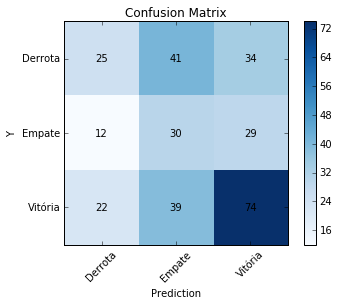

In [13]:
gnb = GaussianNB()
gnb.fit(inputsSeason1,outputsSeason1)
predicts = gnb.predict(inputsSeason2)
print(accuracy_score(outputsSeason2,predicts))
plotConfusionMatrix(outputsSeason2,predicts)

#### Using KFold with SVM 

0.450980392157


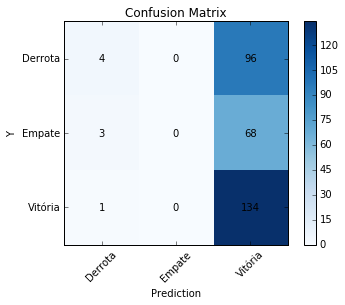

In [14]:
clf = svm.SVC()
clf.fit(inputsSeason1,outputsSeason1)
predicts = clf.predict(inputsSeason2)
print(accuracy_score(outputsSeason2,predicts))
plotConfusionMatrix(outputsSeason2,predicts)

#### Using KFold with Logistic Regression

0.333333333333


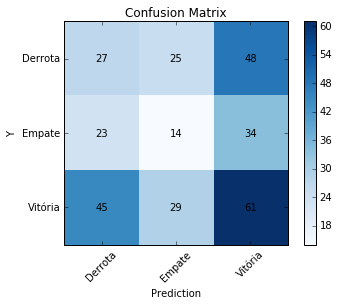

In [15]:
clf = LogisticRegression(penalty='l1')
clf.fit(inputsSeason1,outputsSeason1)
predicts = clf.predict(inputsSeason2)
print(accuracy_score(outputsSeason2,predicts))
plotConfusionMatrix(outputsSeason2,predicts)

#### Using KFold with KNeighborsClassifier

0.37908496732


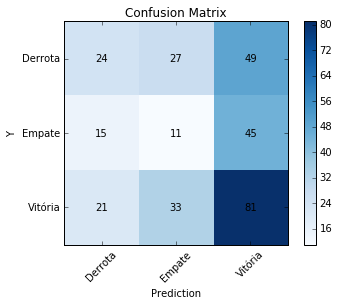

In [16]:
clf = KNeighborsClassifier(n_neighbors=15)
clf.fit(inputsSeason1,outputsSeason1)
predicts = clf.predict(inputsSeason2)
print(accuracy_score(outputsSeason2,predicts))
plotConfusionMatrix(outputsSeason2,predicts)

### Using Time for divided train and test for only 1 season

#### choose all session with not trainning for test

In [17]:
def createMetric():
    return svm.SVC()

In [18]:
errorForSession(inputsSeason1,outputsSeason1,createMetric,season1[:,910],init=4,test="all")

array([ 0.25555556,  0.34482759,  0.49603175,  0.48971193,  0.47863248,
        0.48444444,  0.47685185,  0.46859903,  0.48484848,  0.46031746,
        0.45555556,  0.47368421,  0.48148148,  0.47712418,  0.45138889,
        0.4962963 ,  0.49206349,  0.48717949,  0.52777778,  0.49494949,
        0.48888889,  0.48148148,  0.54166667,  0.57142857,  0.55555556,
        0.55555556,  0.52777778,  0.62962963,  0.61111111,  0.66666667])

#### choose only next stage for test

In [33]:
errorForSession(inputsSeason1,outputsSeason1,createMetric,season1[:,910],init=4,test="nextStage")

array([ 0.33333333,  0.33333333,  0.66666667,  0.55555556,  0.55555556,
        0.55555556,  0.55555556,  0.33333333,  0.77777778,  0.55555556,
        0.22222222,  0.33333333,  0.55555556,  0.55555556,  0.11111111,
        0.66666667,  0.66666667,  0.33333333,  0.77777778,  0.33333333,
        0.55555556,  0.22222222,  0.44444444,  0.66666667,  0.55555556,
        0.66666667,  0.33333333,  0.55555556,  0.55555556,  0.66666667])

### Using Time for divided train and test with 2 two seasons

#### choose all session with not trainning for test

In [23]:
def createWeights(data):
    weights = []    
    for x in range(len(data[:,0])):
        if(x >= 306):
            weights = np.concatenate((weights,[100]))
        else:
            weights = np.concatenate((weights,[0.1]))
    return np.array(weights)

errorForSession(inputsSeason2,outputsSeason2,createMetric,season2[:,910],inputBeforeSession =inputsSeason1,outputBeforeSession =outputsSeason1, weightsFunction = createWeights,init=1,test="all")

array([ 0.49122807,  0.52469136,  0.49673203,  0.54166667,  0.51851852,
        0.48412698,  0.47863248,  0.5       ,  0.53535354,  0.54444444,
        0.5308642 ,  0.5       ,  0.52380952,  0.44444444,  0.42222222,
        0.41666667,  0.44444444,  0.33333333,  0.44444444])